In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

# Fetch MNIST dataset by name, not by data_id
mnist = fetch_openml(name="mnist_784", version=1, as_frame=False, parser="pandas")

X, y = mnist.data, mnist.target
print(X.shape, y.shape)



(70000, 784) (70000,)


In [2]:
x,y=mnist.data,mnist.target


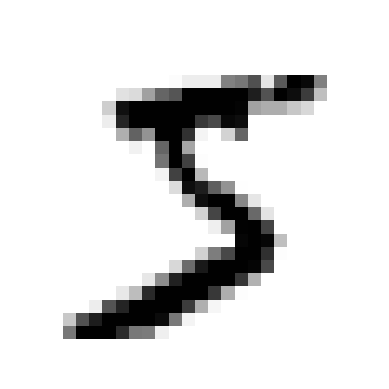

In [3]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
  image=image_data.reshape(28,28)
  plt.imshow(image,cmap='binary')
  plt.axis('off')
some_digit=x[0]
plot_digit(some_digit)
plt.show()

In [4]:
y[0]

'5'

In [5]:
print(np.unique(y, return_counts=True))


(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object), array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]))


In [6]:
X_train, X_test = x[:60000],x[60000:]
y_train, y_test = y[:60000], y[60000:]



In [7]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')


In [8]:
import numpy as np
print(np.unique(y_train_5, return_counts=True))


(array([False,  True]), array([54579,  5421]))


In [9]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
y_train_pred = sgd_clf.predict(X_train)


In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [11]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

False


array([0.90965, 0.90965, 0.90965])

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [13]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train_5,y_train_pred)
print(cm)

[[52316  2263]
 [  601  4820]]


In [14]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5,y_train_pred))
print(recall_score(y_train_5,y_train_pred))

0.6805026118876183
0.8891348459693783


In [15]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)


0.7709532949456174

In [16]:
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[2164.22030239]
[ True]


In [17]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[False]


In [18]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")



In [19]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

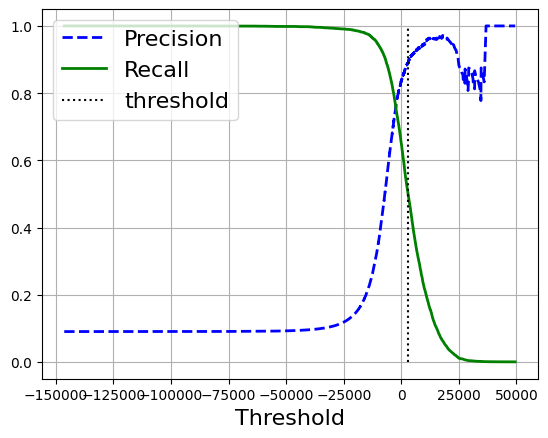

In [20]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision",linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall",linewidth=2)
plt.vlines(threshold,0,1.0,"k","dotted",label="threshold")
plt.xlabel("Threshold", fontsize=16)
plt.legend(loc="upper left", fontsize=16)
plt.grid(True)
plt.show()

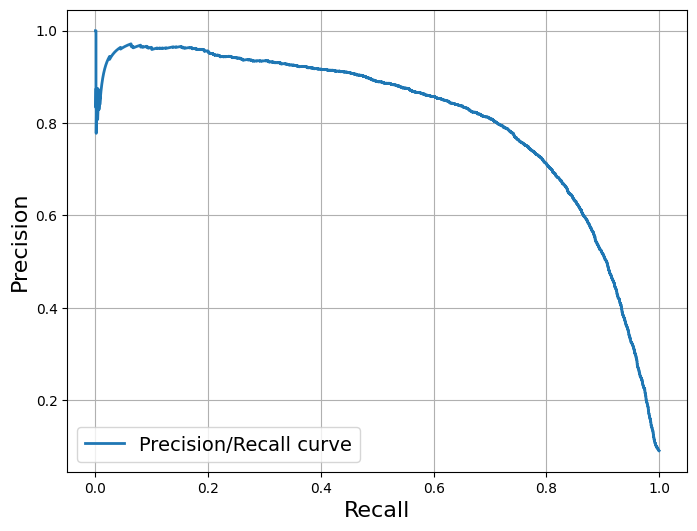

In [21]:
plt.figure(figsize=(8,6))
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.grid(True)
plt.legend(loc="lower left", fontsize=14)
plt.show()


In [22]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

np.float64(3370.0194991439557)

In [23]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)
precision_score(y_train_5, y_train_pred_90)


0.9000345901072293

In [24]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [25]:
 from sklearn.metrics import roc_curve
 fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [26]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

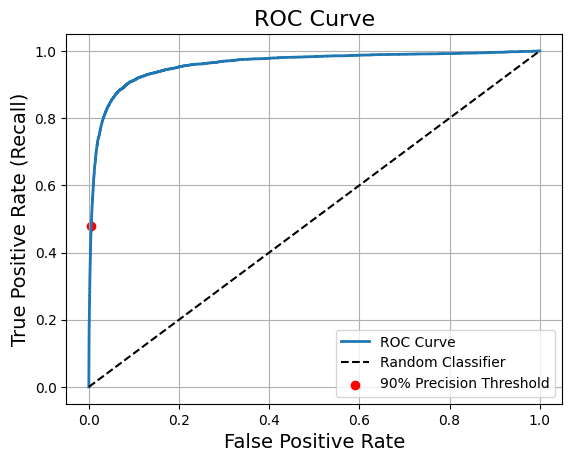

In [27]:
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")  # الخط العشوائي
plt.scatter(fpr_90, tpr_90, color='red', label="90% Precision Threshold")  # النقطة اللي اخترناها

plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate (Recall)", fontsize=14)
plt.title("ROC Curve", fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)


np.float64(0.9604938554008616)

In [29]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(
    forest_clf, X_train, y_train_5, cv=3, method="predict_proba"
)

In [30]:
y_scores_forest = y_probas_forest[:, 1]
y_pred_forest = y_scores_forest >= 0.5

In [31]:
f1 = f1_score(y_train_5, y_pred_forest)
roc_auc = roc_auc_score(y_train_5, y_scores_forest)

print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

F1 Score: 0.9274509803921569
ROC AUC Score: 0.9983436731328145


In [32]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])


SVC(random_state=42)

In [33]:
svm_clf.predict([some_digit])


array(['5'], dtype=object)

In [34]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [35]:
 class_id = some_digit_scores.argmax()
 class_id

np.int64(5)

In [36]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])



OneVsRestClassifier(estimator=SVC(random_state=42))

In [37]:
len(ovr_clf.estimators_)  # => 10


10

In [38]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)


SGDClassifier(random_state=42)

In [39]:
sgd_clf.predict([some_digit])  # ممكن يغلط


array(['3'], dtype='<U1')

In [40]:
sgd_clf.decision_function([some_digit]).round()


array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [41]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
# => حوالي 86% - 87%


array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))

cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
# => حوالي 89% - 90%


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
 y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
 ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
 plt.show()

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
 plt.show()

In [ ]:
 sample_weight = (y_train_pred != y_train)
 ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
 plt.show()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()


In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_train, y_train_pred,
    normalize="true",
    values_format=".0%"
)
plt.show()


In [ ]:
sample_weight = (y_train_pred != y_train)

ConfusionMatrixDisplay.from_predictions(
    y_train, y_train_pred,
    sample_weight=sample_weight,
    normalize="true",
    values_format=".0%"
)


In [ ]:
 import numpy as np
 from sklearn.neighbors import KNeighborsClassifier
 y_train_large = (y_train >= '7')
 y_train_odd = (y_train.astype('int8') % 2 == 1)
 y_multilabel = np.c_[y_train_large, y_train_odd]
 knn_clf = KNeighborsClassifier()
 knn_clf.fit(X_train, y_multilabel)

In [ ]:
knn_clf.predict([some_digit])

In [ ]:
from sklearn.multioutput import ClassifierChain
chain_clf = ClassifierChain(SVC(), cv=3)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])
chain_clf.predict([some_digit])


In [ ]:
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

y_train_mod = X_train   # الهدف الصورة النظيفة
y_test_mod = X_test


In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
